<a href="https://colab.research.google.com/github/Syed-Irfan-1165/ML-Regression/blob/master/Yes_Bank_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Summary

##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.


## <b>Data Description </b>


1.   Date - Date of record
2.   Open - Opening Price
3.   High - Highest price in the day
4.   Low - Lowest price in the day
5.   Close - Occupations of the speaker

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing csv file

YesBank_df = pd.read_csv(r"/content/drive/MyDrive/Linear Regression/data_YesBank_StockPrices.csv")

In [ ]:
YesBank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
YesBank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
YesBank_df.shape

(185, 5)

In [ ]:
YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
YesBank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Exploratory Data Analysis**

## **Handling Outliers**

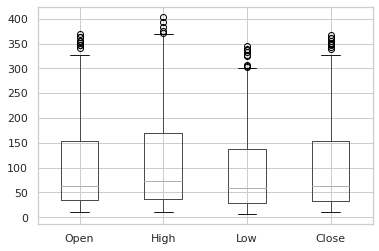

In [ ]:
YesBank_df.boxplot()



##**Cleaning and Manipulating dataset**

In [ ]:
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 12.5, 'Variables')

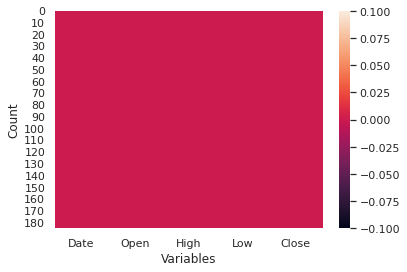

In [ ]:
#plotting the heatmap for checking the null values
data = YesBank_df.isnull()
heat_map = sns.heatmap(data)
plt.ylabel('Count')
plt.xlabel('Variables')

In [ ]:
duplicate = YesBank_df[YesBank_df.duplicated()]
print("Duplicate Values :")

Duplicate Values :


In [ ]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [ ]:
show_missing(YesBank_df).T

,0,1,2,3,4
variable,Date,Open,High,Low,Close
dtype,object,float64,float64,float64,float64
count,185,185,185,185,185
unique,185,183,184,183,185
duplicate,0,0,0,0,0
missing,0,0,0,0,0


In [ ]:
YesBank_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
# convert string object to datetime object

from datetime import datetime
YesBank_df['Date'] = YesBank_df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
# For better visualization let me create seperate columns for month,year from date

YesBank_df['Month'] = YesBank_df['Date'].apply(lambda x: x.strftime('%B')) 
YesBank_df['Year'] = YesBank_df['Date'].apply(lambda x: x.strftime('%Y')) 
YesBank_df['Day'] = pd.to_datetime(YesBank_df['Date']).dt.day_name()

In [ ]:
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Month   185 non-null    object        
 6   Year    185 non-null    object        
 7   Day     185 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 11.7+ KB


In [ ]:
YesBank_df

,Date,Open,High,Low,Close,Month,Year,Day
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005,Friday
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005,Monday
2,2005-09-01,13.48,14.87,12.27,13.30,September,2005,Thursday
3,2005-10-01,13.20,14.47,12.40,12.99,October,2005,Saturday
4,2005-11-01,13.35,13.88,12.88,13.41,November,2005,Tuesday
...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,July,2020,Wednesday
181,2020-08-01,12.00,17.16,11.85,14.37,August,2020,Saturday
182,2020-09-01,14.30,15.34,12.75,13.15,September,2020,Tuesday
183,2020-10-01,13.30,14.01,12.11,12.42,October,2020,Thursday


##Data Visualization

Text(0.5, 6.799999999999979, 'Closing Price')

<Figure size 1080x720 with 0 Axes>

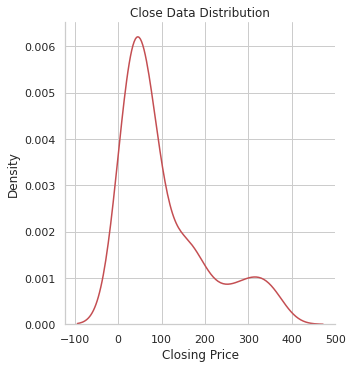

In [ ]:
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.displot(YesBank_df['Close'],color="r",kind ='kde')
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')

In [ ]:
# visualise the data
import plotly.express as px

fig = px.strip(YesBank_df, YesBank_df['Month'], YesBank_df['Close'], title='Monthly closing price')
autosize=False,
width=1400,
height=400
fig.show()
     

In [ ]:
fig = px.bar(YesBank_df, YesBank_df['Year'], YesBank_df['Close'], title='Yearly closing price')
autosize=False,
width=1400,
height=400
fig.show()

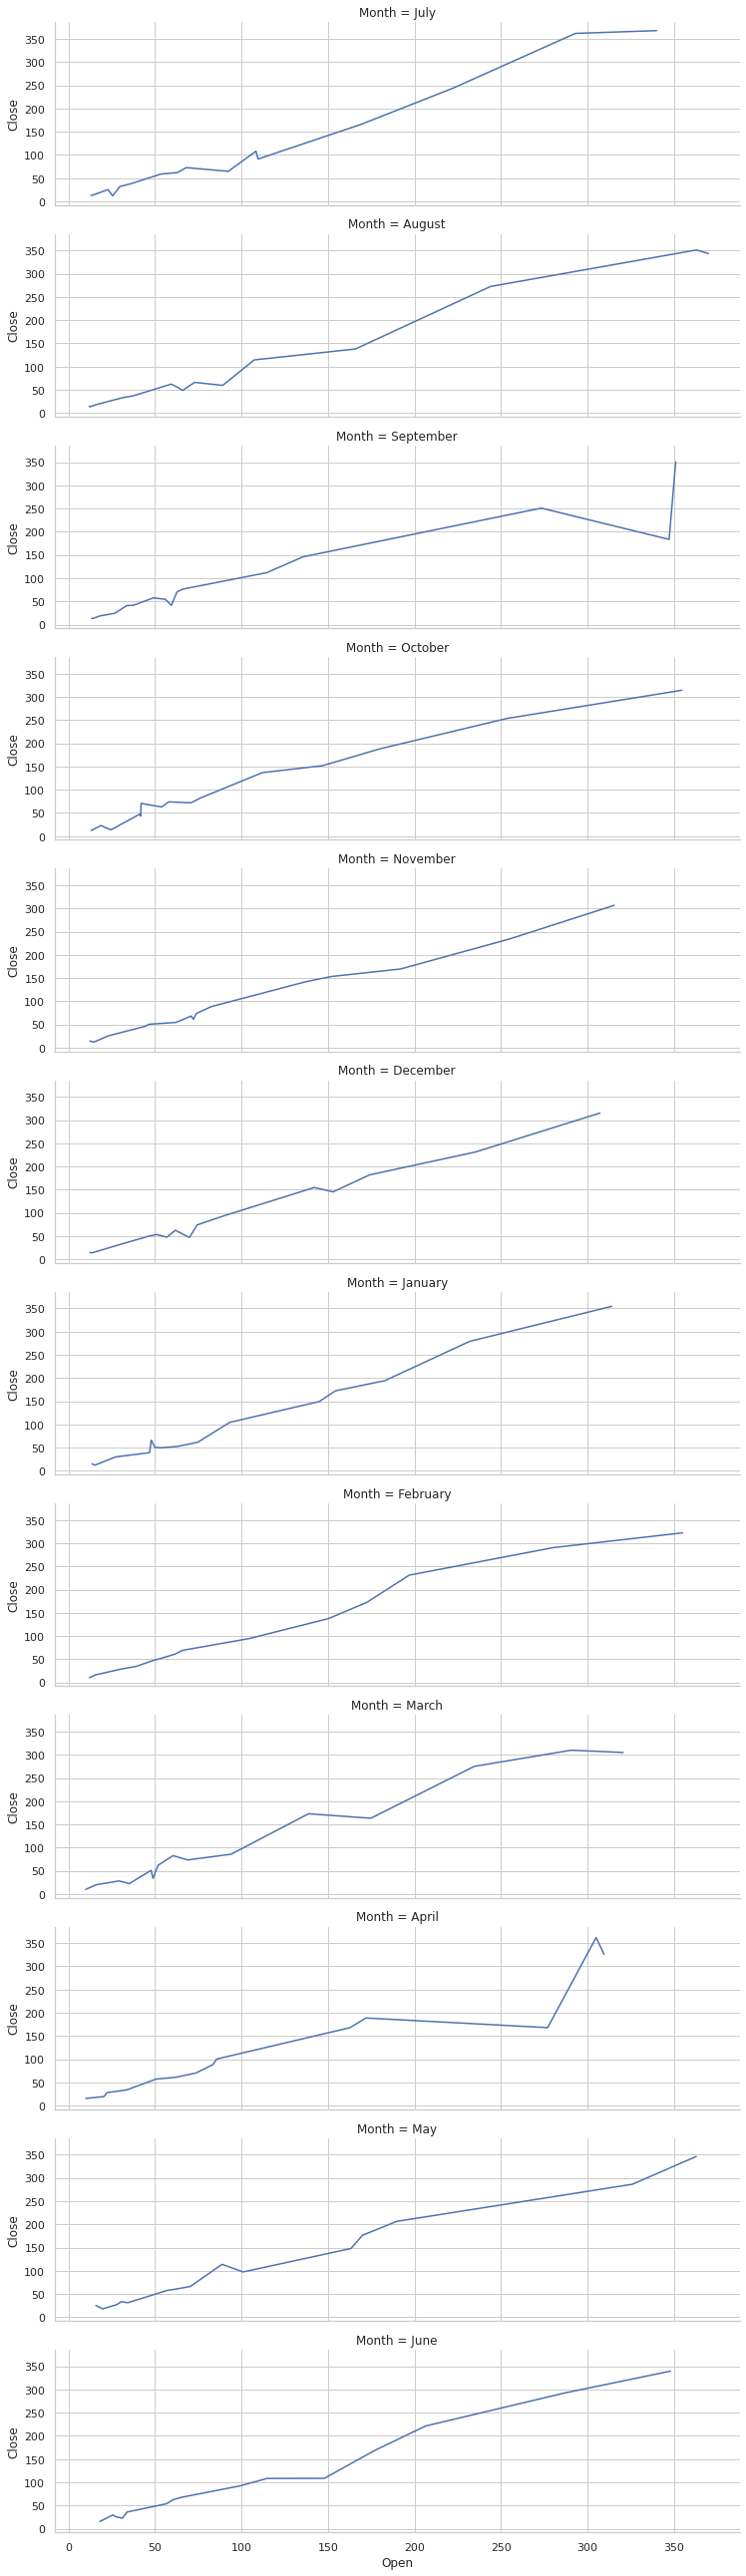

In [ ]:
sns.relplot(data=YesBank_df, x="Open", y="Close",
    row="Month",
    height=3, aspect=3.5,
    kind="line"
)

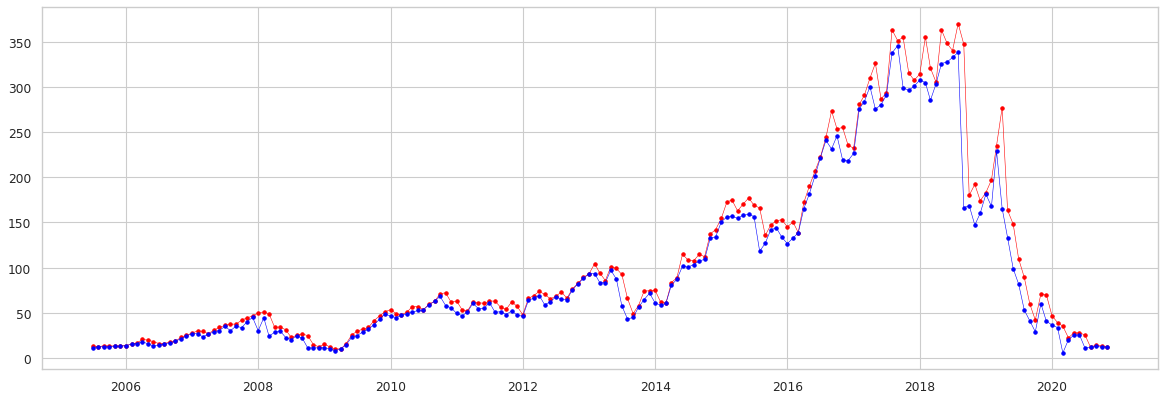

In [ ]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'Open', data=YesBank_df, marker='.', color='red', linewidth=0.5)
# plt.plot( 'Date', 'High', data=YesBank_df, marker='o', color='red', linewidth=1)
plt.plot( 'Date', 'Low', data=YesBank_df, marker='.', color='blue', linewidth=0.5)
#plt.plot( 'Date', 'Close', data=YesBank_df, marker='.', color='black', linewidth=0.5)


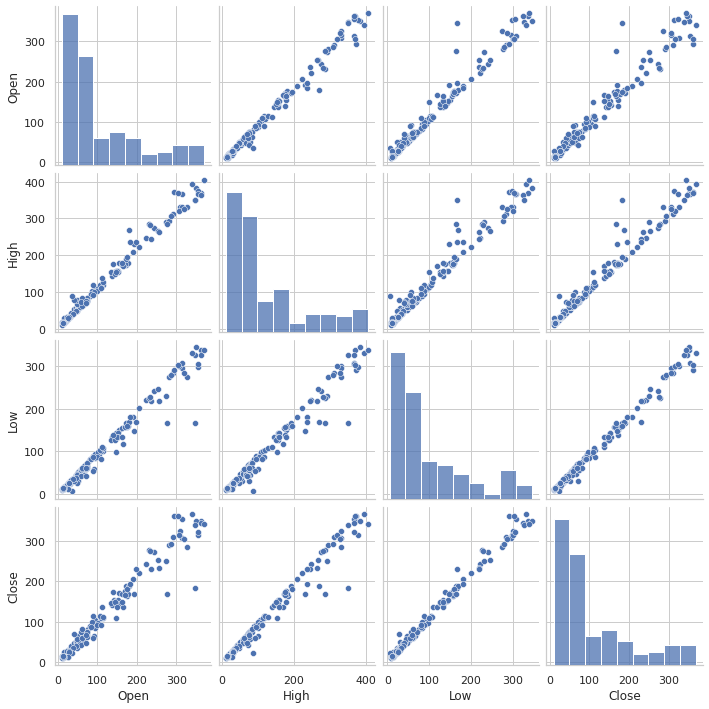

In [ ]:
cols = ['Open', 'High', 'Low', 'Close',]
sns.pairplot(YesBank_df[cols], height = 2.5)

In [ ]:
YesBank_df.skew(axis = 1, skipna = True)

<ipython-input-512-9e4256bf65e3>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     -0.253807
1      1.296154
2      0.495575
3      1.088047
4      0.000000
         ...   
180    0.069940
181    0.961512
182    0.535863
183    0.441802
184    0.005410
Length: 185, dtype: float64

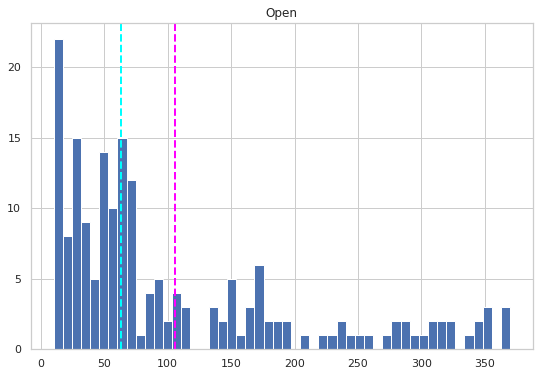

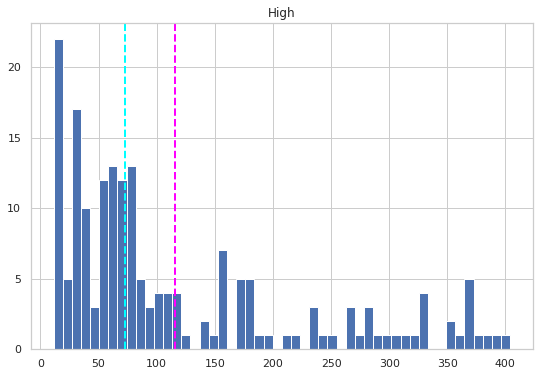

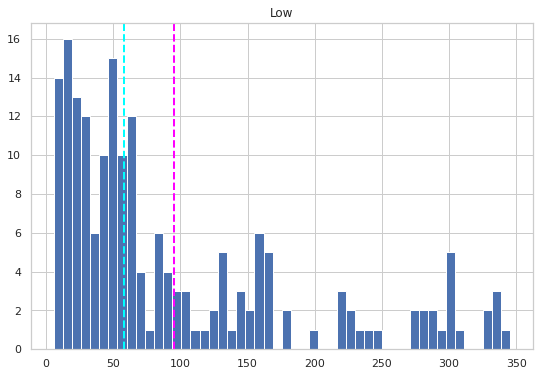

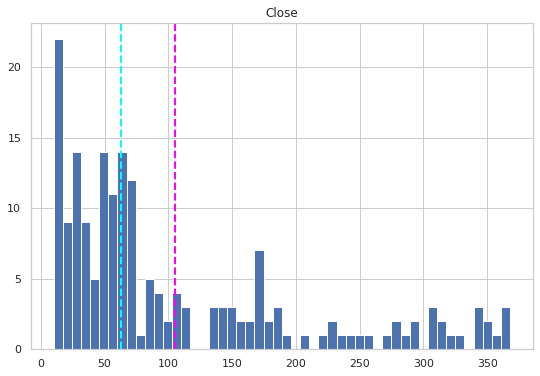

In [ ]:
# Check for skewness in the dataset

numeric_features = YesBank_df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
#Plotting Open vs Close vs High 3d plot for better visualization

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(YesBank_df, x='Date', y='Open', z='Close',
              color='High')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


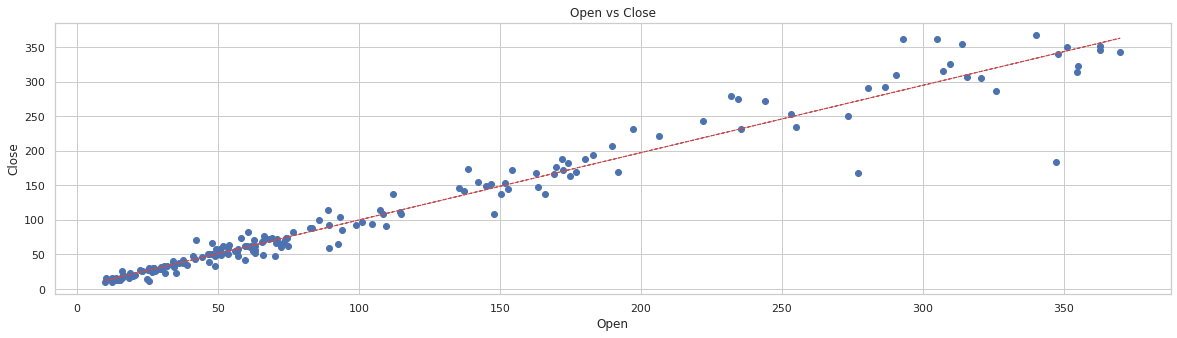

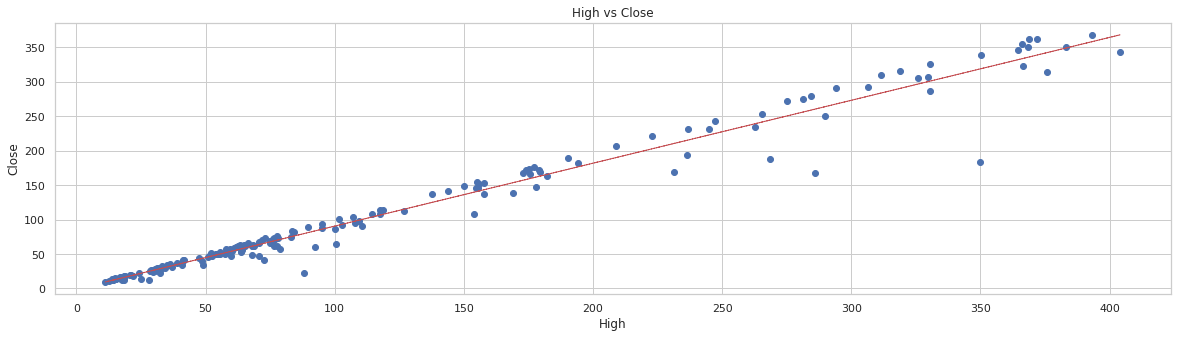

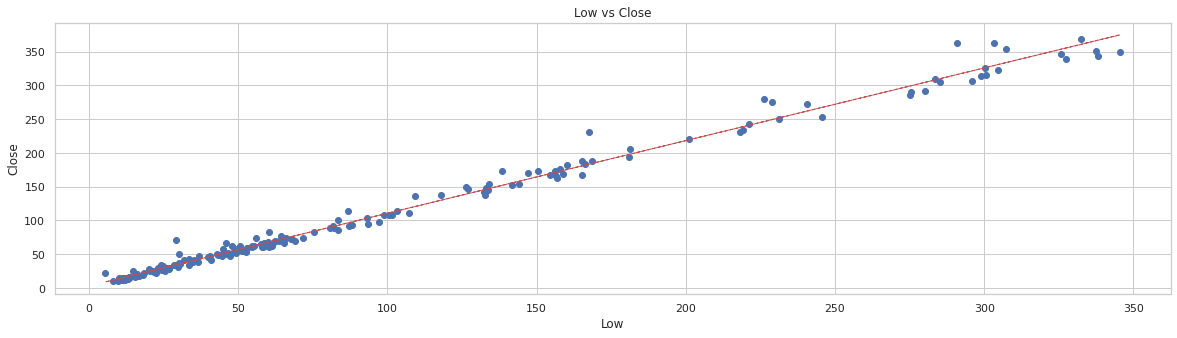

In [ ]:
# scatter plot to see the relationship between dependent & independent variables
for col in YesBank_df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(YesBank_df[col], YesBank_df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
  y_hat = np.poly1d(z)(YesBank_df[col])
  plt.plot(YesBank_df[col], y_hat, "r--", lw=1)
  plt.show()

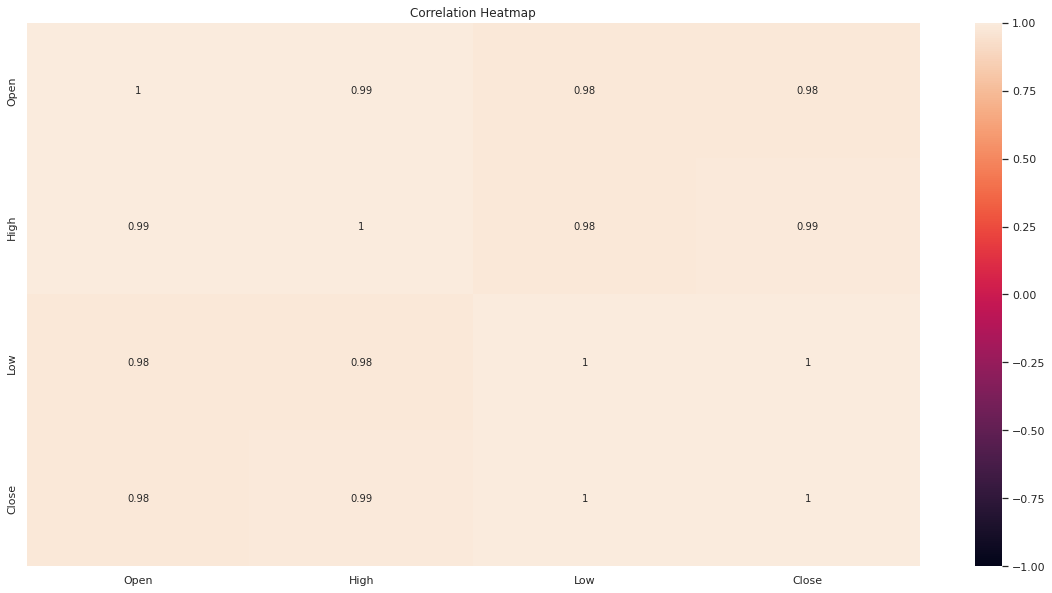

In [ ]:

# check for existence of corelation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor = sns.heatmap(YesBank_df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

##**Feature Engineering**

In [ ]:
#Adding a new feature for comaparing old features from the new feature that is the avg of Open and Close

YesBank_df['OC'] = YesBank_df[['Open', 'Close',]].mean(axis=1).round(2)
YesBank_df['LH'] = YesBank_df[['Low', 'High',]].mean(axis=1).round(2)


In [ ]:
YesBank_df.head()

,Date,Open,High,Low,Close,Month,Year,Day,OC,LH
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005,Friday,12.73,12.62
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005,Monday,13.00,13.72
2,2005-09-01,13.48,14.87,12.27,13.30,September,2005,Thursday,13.39,13.57
3,2005-10-01,13.20,14.47,12.40,12.99,October,2005,Saturday,13.10,13.44
4,2005-11-01,13.35,13.88,12.88,13.41,November,2005,Tuesday,13.38,13.38


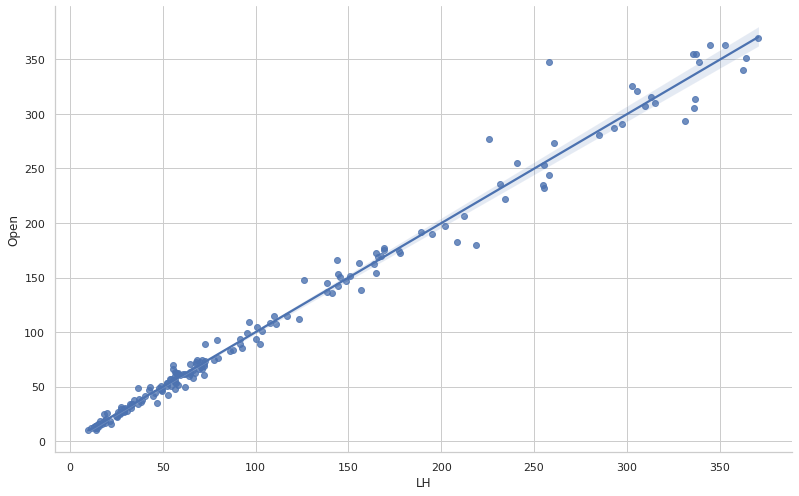

<Figure size 1440x360 with 0 Axes>

In [ ]:

sns.lmplot(x = "LH",
            y = "Open", 
           height=7, aspect=1.6,
            data = YesBank_df)
fig = plt.figure(figsize=(20,5))
sns.set(style="white", color_codes=True)

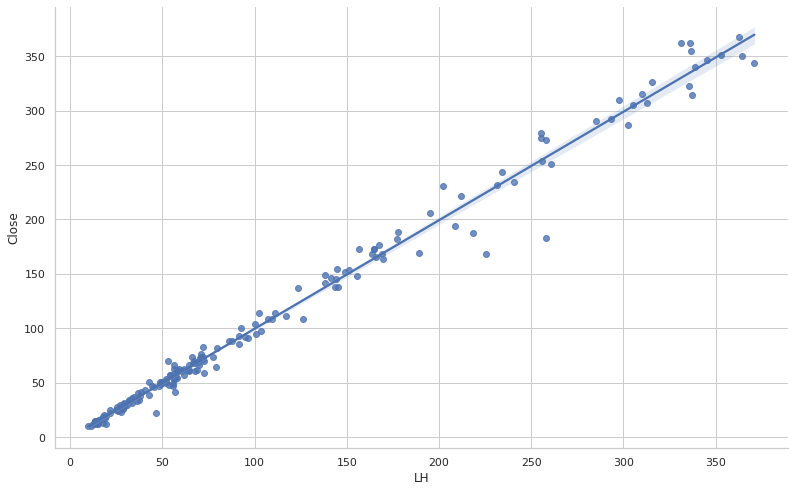

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.lmplot(x = "LH",
            y = "Close", 
           height=7, aspect=1.6,
            data = YesBank_df)

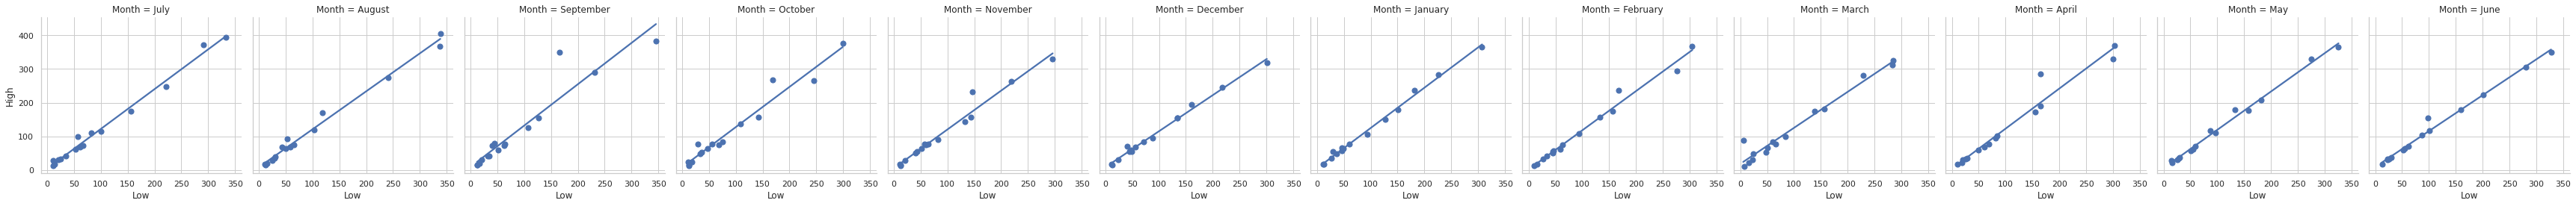

In [ ]:
sns.lmplot(x="Low", y="High",col="Month", data=YesBank_df,
           ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

plt.show()

##Model Building

In [ ]:
#storing the independent values in  X variable 

X=YesBank_df.iloc[:,1:4:]

In [ ]:
X

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88
...,...,...,...
180,25.60,28.30,11.10
181,12.00,17.16,11.85
182,14.30,15.34,12.75
183,13.30,14.01,12.11


In [ ]:
#storing the dependent values in  y variable
 
y=YesBank_df.iloc[:,4]

In [ ]:
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [ ]:
##Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [ ]:
X_train

,Open,High,Low
115,172.50,173.88,156.10
78,47.92,66.50,46.11
36,22.85,30.50,20.40
128,138.80,175.12,138.35
22,30.66,36.14,29.11
...,...,...,...
106,88.80,117.60,86.98
14,18.00,18.88,16.80
92,94.00,100.15,83.42
179,27.75,31.95,25.55


In [ ]:
y_train

115    172.55
78      65.99
36      25.45
128    172.91
22      33.51
        ...  
106    113.89
14      18.46
92      85.71
179     25.60
102     61.59
Name: Close, Length: 123, dtype: float64

In [ ]:
##standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.71985541,  0.58588253,  0.68484704],
       [-0.58591372, -0.45797295, -0.54536406],
       [-0.84868168, -0.80793381, -0.83292409],
       [ 0.36663323,  0.59793674,  0.48631765],
       [-0.76682218, -0.75310661, -0.73550488],
       [ 0.04831401,  0.00825269,  0.06230363],
       [ 0.33319766,  0.40720807,  0.35937069],
       [ 0.53014261,  0.63565475,  0.62187687],
       [-0.89742006, -0.92555954, -0.91121737],
       [-0.81985791, -0.8293203 , -0.9369423 ],
       [ 2.7165565 ,  2.47800426,  2.71230741],
       [-0.94479585, -0.93761375, -0.90920411],
       [-0.65005971, -0.64461874, -0.68528534],
       [-0.18992755, -0.11481688, -0.12794904],
       [-0.9482547 , -0.96949907, -0.91703344],
       [-0.57564198, -0.62906492, -0.79142865],
       [-0.31255958, -0.35327632, -0.33799872],
       [ 1.91640867,  1.87354408,  2.07298687],
       [-0.30836703, -0.29757422, -0.25992914],
       [ 0.06057721, -0.02927089, -0.14673943],
       [-0.88064986, -0.89250768, -0.884

In [ ]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

-34.61744111823393

In [ ]:
#Prediction 
reg_pred = regression.predict(X_test)

In [ ]:
#Creating a datafram to compare Predicted vs Actual values
df_scores_comp = pd.DataFrame({'Actual':y_test, 'Predicted':reg_pred})
df_scores_comp

,Actual,Predicted
19,28.63,29.833559
42,12.24,14.686781
156,367.90,378.001206
111,136.83,130.265047
148,306.80,314.411102
...,...,...
85,65.97,69.045042
150,354.45,351.349459
26,41.36,39.770518
158,183.45,187.363273


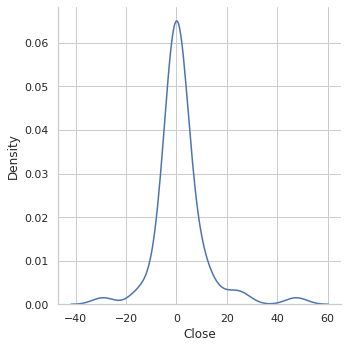

In [ ]:
sns.displot(reg_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,y_test)

In [ ]:
score

0.9908345931186975

#Finding Zscores

In [ ]:
YesBank_df['Close_Z_score'] = stats.zscore(YesBank_df['Close'])
YesBank_df['Open_Z_score'] = stats.zscore(YesBank_df['Open'])
YesBank_df['High_Z_score'] = stats.zscore(YesBank_df['High'])
YesBank_df['Low_Z_score'] = stats.zscore(YesBank_df['Low'])

In [ ]:
YesBank_df 

,Date,Open,High,Low,Close,Month,Year,Day,OC,LH,Close_Z_score,Open_Z_score,High_Z_score,Low_Z_score
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005,Friday,12.73,12.62,-0.943329,-0.938437,-0.962833,-0.920034
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005,Monday,13.00,13.72,-0.933565,-0.942696,-0.954535,-0.905744
2,2005-09-01,13.48,14.87,12.27,13.30,September,2005,Thursday,13.39,13.57,-0.934786,-0.933570,-0.954629,-0.908822
3,2005-10-01,13.20,14.47,12.40,12.99,October,2005,Saturday,13.10,13.44,-0.937939,-0.936409,-0.958401,-0.907393
4,2005-11-01,13.35,13.88,12.88,13.41,November,2005,Tuesday,13.38,13.38,-0.933667,-0.934888,-0.963965,-0.902117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,July,2020,Wednesday,18.77,19.70,-0.948517,-0.810664,-0.827986,-0.921683
181,2020-08-01,12.00,17.16,11.85,14.37,August,2020,Saturday,13.18,14.50,-0.923902,-0.948578,-0.933035,-0.913439
182,2020-09-01,14.30,15.34,12.75,13.15,September,2020,Tuesday,13.73,14.04,-0.936311,-0.925254,-0.950197,-0.903546
183,2020-10-01,13.30,14.01,12.11,12.42,October,2020,Thursday,12.86,13.06,-0.943736,-0.935395,-0.962739,-0.910581


In [ ]:
data = YesBank_df.iloc[:,10:]

In [ ]:
Z_scores = pd.DataFrame(data)

In [ ]:
Z_scores

,Close_Z_score,Open_Z_score,High_Z_score,Low_Z_score
0,-0.943329,-0.938437,-0.962833,-0.920034
1,-0.933565,-0.942696,-0.954535,-0.905744
2,-0.934786,-0.933570,-0.954629,-0.908822
3,-0.937939,-0.936409,-0.958401,-0.907393
4,-0.933667,-0.934888,-0.963965,-0.902117
...,...,...,...,...
180,-0.948517,-0.810664,-0.827986,-0.921683
181,-0.923902,-0.948578,-0.933035,-0.913439
182,-0.936311,-0.925254,-0.950197,-0.903546
183,-0.943736,-0.935395,-0.962739,-0.910581


In [ ]:
YesBank_df.drop(['Close_Z_score','Open_Z_score','High_Z_score','Low_Z_score'], axis=1,inplace=True)

In [ ]:
YesBank_df

,Date,Open,High,Low,Close,Month,Year,Day,OC,LH
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005,Friday,12.73,12.62
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005,Monday,13.00,13.72
2,2005-09-01,13.48,14.87,12.27,13.30,September,2005,Thursday,13.39,13.57
3,2005-10-01,13.20,14.47,12.40,12.99,October,2005,Saturday,13.10,13.44
4,2005-11-01,13.35,13.88,12.88,13.41,November,2005,Tuesday,13.38,13.38
...,...,...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,July,2020,Wednesday,18.77,19.70
181,2020-08-01,12.00,17.16,11.85,14.37,August,2020,Saturday,13.18,14.50
182,2020-09-01,14.30,15.34,12.75,13.15,September,2020,Tuesday,13.73,14.04
183,2020-10-01,13.30,14.01,12.11,12.42,October,2020,Thursday,12.86,13.06


In [ ]:
Z_scores

,Close_Z_score,Open_Z_score,High_Z_score,Low_Z_score
0,-0.943329,-0.938437,-0.962833,-0.920034
1,-0.933565,-0.942696,-0.954535,-0.905744
2,-0.934786,-0.933570,-0.954629,-0.908822
3,-0.937939,-0.936409,-0.958401,-0.907393
4,-0.933667,-0.934888,-0.963965,-0.902117
...,...,...,...,...
180,-0.948517,-0.810664,-0.827986,-0.921683
181,-0.923902,-0.948578,-0.933035,-0.913439
182,-0.936311,-0.925254,-0.950197,-0.903546
183,-0.943736,-0.935395,-0.962739,-0.910581


#Hypothesis 1

How it works?\
Consider, there is a magazine that says, on an average there are 12% Indian employees in a company in US.

Assumptions:
Test-statistic: An average company has 12% Indian employees, i.e., μ (Population) = 0.12.
Null Hypothesis (H0) : There are 12% of Indian employees in a company.
Alternative Hypothesis (Ha) : There are more than 12% of Indian employees in a company in US.
Significance Level: α = 0.05 (generally a low value)
Sample statistic: We take a company X and we check for 50 employees and find that more than 20% are Indian.
We perform n experiments, and if probability of getting the sample statistic, given there are 12% Indian employees, for n observations (p-value) is less than 0.05 we Reject the Null Hypothesis and Accept the Alternative Hypothesis, otherwise we do not Reject the Null Hypothesis.
p-value = P( μ (sample) > 20% | H0 is True )

Hypothetical Statement - 1

"The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices." (Null Hypothesis)

"The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices." (Alternative Hypothesis)

Defining null hypothesis and alternate hypothesis.

H0: μpredicted - μactual = 0

Where:\
μpredicted = mean of predicted closing prices\
μactual = mean of actual closing prices

The equation form of the alternative hypothesis "The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices" would be:

H1: μpredicted - μactual ≠ 0

Where:\
μpredicted = mean of predicted closing prices\
μactual = mean of actual closing prices

This is assuming that you are using a t-test, where the null hypothesis is that the means of the two groups (predicted and actual closing prices) are equal and the alternative hypothesis is that they are not equal.

Significance Value = 0.05 or 5%

In [ ]:
Predicted_mean = round(df_scores_comp["Predicted"].mean())
Actual_mean = round(df_scores_comp["Actual"].mean())
print(Predicted_mean,Actual_mean)

107 106


In [ ]:
Pred_sample = df_scores_comp['Predicted'].sample(n=10, random_state=1)

In [ ]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Pred_sample,10)

In [ ]:
print(round(p_value,3))

0.023


In [582]:
if p_value > 0.05:
  print("we are Not accpeting null hypothesis")
else:
  print("we are rejecting null hypothesis")
  

we are Not accpeting null hypothesis


conclusion

As the p-value is less than the significance level i.e 0.023 < 0.05, we reject the null hypothesis and conclude that the predicted closing prices are significantly different from the actual closing prices.

In [ ]:
#############################################################################

In [ ]:
import scipy.stats as stats

In [ ]:
#calculating Variance
YesBank_df['Close'].var()

9718.637983742654

In [ ]:
#Calculating mean
Closecol = YesBank_df.iloc[:,4:5]
Close_mean = np.mean(Closecol)
Close_mean

Close    105.204703
dtype: float64

In [ ]:
#Calculating std
import statistics
sd_close = YesBank_df['Close'].std()

In [ ]:
#calculating p_value

Close_sample = YesBank_df['Close'].sample(n=10, random_state=1)

In [ ]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Close_sample,10)

In [ ]:
print(round(p_value,3))

0.07


In [ ]:
if p_value < 0.05:
  print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

we are accepting null hypothesis


#Hypothesis 2

Hypothetical Statement - 2

"The linear regression model used to predict the closing prices of Yes Bank stock is not a good fit for the data." (Null Hypothesis)

"The linear regression model used to predict the closing prices of Yes Bank stock is a good fit for the data." (Alternative Hypothesis)

Defining null hypothesis and alternate hypothesis.

H0: The linear regression model does not fit the data well.\
H1: The linear regression model fits the data well.

In [ ]:
df_scores_comp

,Actual,Predicted
19,28.63,29.833559
42,12.24,14.686781
156,367.90,378.001206
111,136.83,130.265047
148,306.80,314.411102
...,...,...
85,65.97,69.045042
150,354.45,351.349459
26,41.36,39.770518
158,183.45,187.363273


In [ ]:
predicted = df_scores_comp['Predicted']
actual = df_scores_comp['Actual']

In [ ]:
from sklearn.metrics import r2_score
R2_score = r2_score(predicted,actual)
R2_score

0.9908345931186975

In [ ]:
if R2_score <= 0.5:
   print(" The linear regression model does not fit the data well.")
if R2_score >= 0.5: 
  print(" The linear regression model fits the data well.") 
 

 The linear regression model fits the data well.


As we know that the R-squared value is commonly used to assess the goodness of fit of a linear regression model. A high R-squared value (close to 1) indicates that the model fits the data well and has a good explanatory power. A low R-squared value (close to 0) indicates that the model does not fit the data well and has poor explanatory power.

Conclusion

As we can see that the R-squared value is close to 1. Hence we can conclude that "The linear regression model fits the data well".

In [ ]:
#################################################################

In [ ]:

Opencol = YesBank_df.iloc[:,1:2]
Open_mean = np.mean(Opencol)
Open_mean

sd_High = YesBank_df['Open'].std()

Open_sample = YesBank_df['Open'].sample(n=10, random_state=1)

ttest,p_value=ttest_1samp(Open_sample,30)

print(round(p_value,2))

if p_value < 0.05:
  print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")



0.15
we are accepting null hypothesis


#Hypothesis 3

"The linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power." (Null Hypothesis)

"The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power." (Alternative Hypothesis)

Defining null hypothesis and alternate hypothesis.

H0: β1 = 0\
Where:
β1 = the coefficient of the independent variable in the linear regression model

H1: β1 ≠ 0\
Where:
β1 = the coefficient of the independent variable in the linear regression model


###Performing F-Test

In [ ]:
import statsmodels.api as sm

In [ ]:
inde = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
inde

,const,Open,High,Low
0,1.0,13.00,14.00,11.25
1,1.0,12.58,14.88,12.55
2,1.0,13.48,14.87,12.27
3,1.0,13.20,14.47,12.40
4,1.0,13.35,13.88,12.88
...,...,...,...,...
180,1.0,25.60,28.30,11.10
181,1.0,12.00,17.16,11.85
182,1.0,14.30,15.34,12.75
183,1.0,13.30,14.01,12.11


In [ ]:
results = sm.OLS(y, inde).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[12187.05615406]]), p=1.5995940052004147e-208, df_denom=181, df_num=3>


In [ ]:
fres = results.f_test(A)
dir(fres)
F_stat_value = fres.fvalue
#fres.pvalue

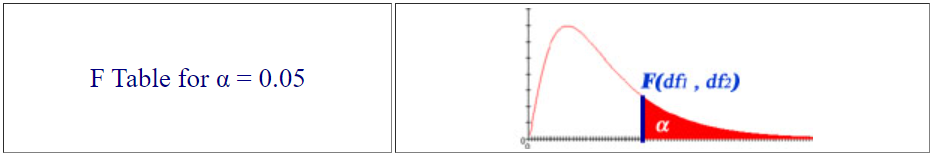\

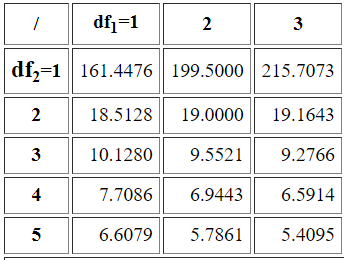\


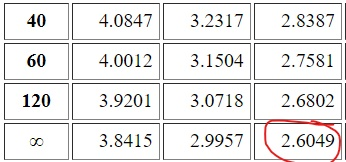


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Thu, 26 Jan 2023   Prob (F-statistic):          1.60e-208
Time:                        18:10:54   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.0

In [ ]:
if F_stat_value > 2.6049:
  print("we reject the null hypothesis")
else:
  print("we accept the null hypothesis")

we reject the null hypothesis


Conclusion

We get an F-critical value of 2.6049 which is much lower than our F-statistic score of 12187.05615406. Since, F-statistic > F-critical we reject the null hypothesis,this would indicate that the independent variable is a significant predictor of the dependent variable, and that the linear regression model has a significant predictive power.

In [ ]:
#########################################################################

In [ ]:
Highcol = YesBank_df.iloc[:,2:3]
High_mean = np.mean(Highcol)
High_mean

sd_High = YesBank_df['High'].std()

High_sample = YesBank_df['High'].sample(n=10, random_state=1)

ttest,p_value=ttest_1samp(High_sample,30)

print(round(p_value,2))

if p_value < 0.05:
  print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")


0.12
we are accepting null hypothesis




#**Model building**

##**Conclusion**